<a href="https://colab.research.google.com/github/brandon-mason/cs4337-collabs/blob/main/Chapter3_OpenCVApplication_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://images.saymedia-content.com/.image/t_share/MTc2Mjg2OTE5Nzc5ODIwNzE3/horsing-around-horses-do-the-funniest-things.jpg -O image1.jpg
!wget -q https://parade.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTkwNTgxMTA1NjY0MjA1OTQ5/funny-pictures.webp -O image2.jpg
!wget -q https://www.usatoday.com/gcdn/authoring/authoring-images/2023/10/05/USAT/71072164007-jacek-stankiewicz-dispute.jpg -O image3.jpg
!wget -q https://cdn.mos.cms.futurecdn.net/aswWNrtS45neL87xPmu86T.jpg -O image4.jpg

## 3. **Video Processing in Jupyter Notebooks**

### Purpose
Video processing is an extension of image processing, where multiple frames are analyzed over time. Reading videos, extracting frames, and manipulating them opens possibilities for temporal analysis in vision.

### Use Cases
- **Frame-by-Frame Analysis**: You can load a video as a sequence of frames to extract specific information. This is useful in surveillance, where you might want to analyze a specific segment of the video.
- **Grayscale Conversion**: Converting video frames to grayscale can significantly reduce the computational cost when you don’t need color information, such as in motion detection or edge detection.

### Real-World Application
- In sports analytics, converting video into frames and analyzing player movement frame by frame can be used to assess performance metrics or detect key moments in the game.

---
## 4. **Optical Flow Visualization and Prediction**

### Purpose
Optical flow estimates motion between consecutive frames in a video by calculating pixel displacements. This is a powerful tool for understanding object movement and predicting future positions.

### Use Cases
- **Visualizing Optical Flow**: Optical flow can be represented as a color map, where colors indicate the direction and magnitude of movement. This helps in understanding how objects move in a scene.
- **Predicting the Next Frame**: By using optical flow to warp the current frame, we can predict how the next frame will look based on motion. This is useful in video compression, video interpolation, and predicting future movements.

### Real-World Application
- In autonomous driving, optical flow helps the vehicle’s vision system understand the movement of pedestrians or other vehicles in its surroundings, which is crucial for safe navigation.

---

## 5. **Kernels and Filters in OpenCV**

### Purpose
Kernels (or filters) are used to apply different effects or extract features from an image. Convolution with kernels is fundamental to many image processing tasks, such as blurring, sharpening, and edge detection.

### Use Cases
- **Gaussian Blur**: This reduces noise and smooths the image, which is essential in pre-processing for edge detection or object recognition.
- **Sobel Edge Detection**: Sobel filters are used to detect edges by calculating the gradient of pixel intensity. It’s a critical step in tasks like object boundary detection.
- **Laplacian and Sharpening**: These filters enhance image details or edges, making them useful in applications like image restoration or preparing images for further analysis.

### Real-World Application
- In facial recognition, edge detection filters (like Sobel) are used to outline key facial features, helping algorithms distinguish between different faces by analyzing the geometry of the contours.

---

## 3. Video Processing in Jupyter Notebooks

### Objective
Process video files in Jupyter, read video frames, and apply basic operations like converting to grayscale.

### Reading a Video File

In [ ]:
!pip install -q yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.8 MB/s eta 0:00:00


In [ ]:
!yt-dlp -o "meme.%(ext)s" https://www.youtube.com/watch?v=cdIs7VujZqs

[youtube] Extracting URL: https://www.youtube.com/watch?v=cdIs7VujZqs
[youtube] cdIs7VujZqs: Downloading webpage
[youtube] cdIs7VujZqs: Downloading ios player API JSON
[youtube] cdIs7VujZqs: Downloading mweb player API JSON
[youtube] cdIs7VujZqs: Downloading player e627e516
[youtube] cdIs7VujZqs: Downloading m3u8 information
[info] cdIs7VujZqs: Downloading 1 format(s): 243+251
[download] Destination: meme.f243.webm
[download] 100% of   71.98KiB in 00:00:00 at 1.49MiB/s
[download] Destination: meme.f251.webm
[download] 100% of    4.94KiB in 00:00:00 at 51.06KiB/s
[Merger] Merging formats into "meme.webm"
Deleting original file meme.f243.webm (pass -k to keep)
Deleting original file meme.f251.webm (pass -k to keep)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load video file as frames
video_path = 'meme.webm'

# Load video frames
def load_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

video_frames = load_video_frames(video_path)

In [ ]:
len(video_frames)

315

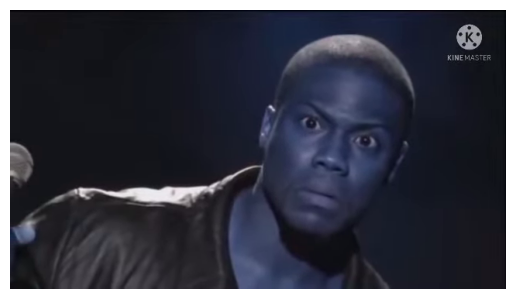

In [ ]:
plt.imshow(video_frames[67])
plt.axis('off')
plt.show()

---

## 4. Optical Flow Visualization and Prediction

### Objective
Visualize optical flow as a color map and predict the next video frame.

### Visualizing Optical Flow

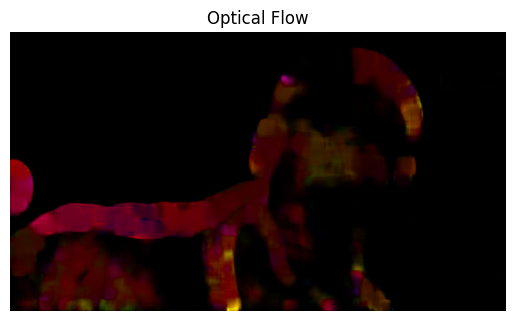

In [ ]:
# Assuming video_frames contains the loaded video frames
prev_gray = cv2.cvtColor(video_frames[42], cv2.COLOR_BGR2GRAY)

# Visualizing optical flow between two frames
def visualize_optical_flow(prev_frame, next_frame):
    flow = cv2.calcOpticalFlowFarneback(prev_frame, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv = np.zeros_like(video_frames[0])
    hsv[..., 1] = 255
    hsv[..., 0] = angle * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    return flow, cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

next_gray = cv2.cvtColor(video_frames[43], cv2.COLOR_BGR2GRAY)
flow, flow_image = visualize_optical_flow(prev_gray, next_gray)
plt.imshow(flow_image)
plt.title('Optical Flow')
plt.axis('off')
plt.show()

In [ ]:
# Initialize the DIS (dense inverse search) optical flow algorithm
dis = cv2.DISOpticalFlow_create(cv2.DISOPTICAL_FLOW_PRESET_ULTRAFAST)

# Compute dense optical flow using DISOpticalFlow
flow = dis.calc(prev_gray, next_gray, None)

In [ ]:
!pip -q install flowiz

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 19.7 MB/s eta 0:00:00


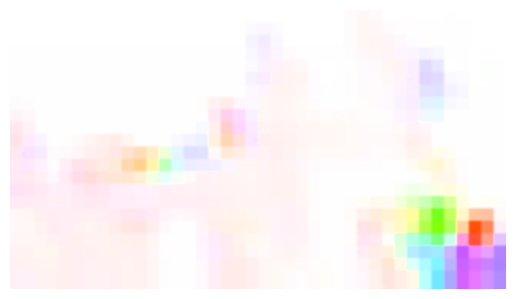

In [ ]:
import flowiz as fz

# Use flowiz to convert the optical flow to an RGB image
flow_rgb = fz.convert_from_flow(flow)

# Plot the RGB flow image using matplotlib
plt.imshow(flow_rgb)
plt.axis('off')  # Hide axis
plt.show()


### Predicting the Next Frame


-- raft

ref: https://colab.research.google.com/drive/1CpL0gIbLciyFO1tkacBgKumJdA4kWISr?usp=sharing

(-0.5, 639.5, 359.5, -0.5)

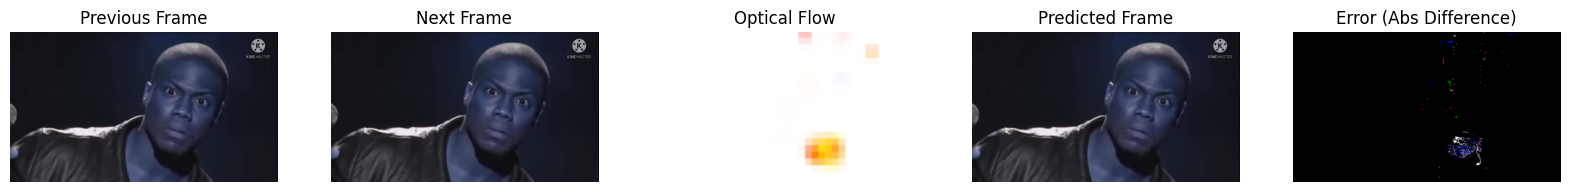

In [ ]:
# Predict the next frame using optical flow
def predict_next_frame(prev_frame, flow):
    h, w = prev_frame.shape[:2]
    flow_map = -flow # Why -flow? Can you bring this discussion in the class?
    flow_map[..., 0] += np.arange(w) # Why there is no [:, np.newaxis]
    flow_map[..., 1] += np.arange(h)[:, np.newaxis] # or [:, None], why here?
    return cv2.remap(prev_frame, flow_map, None, cv2.INTER_LINEAR)

dis = cv2.DISOpticalFlow_create(cv2.DISOPTICAL_FLOW_PRESET_ULTRAFAST)

prev_frame, next_frame = video_frames[32], video_frames[33]
# Convert frames to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

# Compute optical flow using DIS (on grayscale images)
flow = dis.calc(prev_gray, next_gray, None)

# Use flowiz to convert the optical flow to an RGB image
flow_rgb = fz.convert_from_flow(flow)

predicted_frame = predict_next_frame(prev_frame, flow)
predicted_rgb = cv2.cvtColor(predicted_frame, cv2.COLOR_BGR2RGB)


error = np.abs(next_frame - predicted_frame)

# Plot all frames in a row with appropriate titles
plt.figure(figsize=(20, 5))

# Plot previous frame
plt.subplot(1, 5, 1)
plt.imshow(prev_frame)
plt.title('Previous Frame')
plt.axis('off')

# Plot next frame
plt.subplot(1, 5, 2)
plt.imshow(next_frame)
plt.title('Next Frame')
plt.axis('off')


# Plot the RGB flow image using matplotlib
plt.subplot(1, 5, 3)
plt.imshow(flow_rgb)
plt.title('Optical Flow')
plt.axis('off')

# Plot predicted frame
plt.subplot(1, 5, 4)
plt.imshow(predicted_frame)
plt.title('Predicted Frame')
plt.axis('off')

# Plot the error
plt.subplot(1, 5, 5)
plt.imshow(error)
plt.title('Error (Abs Difference)')
plt.axis('off')


# plt.imshow(predicted_rgb)
# plt.title('Predicted Next Frame')
# plt.axis('off')
# plt.show()

## What the Optical Flow?

##### **What is Optical Flow?**

**Optical flow** refers to the apparent motion of objects, surfaces, or edges in a scene as observed between two consecutive frames in a video or image sequence. It calculates the displacement of every pixel between two frames, resulting in a dense or sparse field of vectors, with each vector indicating the direction and magnitude of pixel movement.

##### **Why is Optical Flow Important?**
Optical flow is widely used in computer vision applications, such as:
- **Motion Estimation**: Understanding how objects or scenes move over time.
- **Object Tracking**: Tracking moving objects within a video sequence.
- **Video Compression**: Using motion vectors to efficiently compress video by predicting subsequent frames.
- **Autonomous Vehicles and Robotics**: Estimating the depth of scenes and navigating through environments.
- **Action Recognition**: Recognizing actions based on patterns of motion in videos.

Optical flow helps algorithms understand the dynamics of a scene, enabling tasks that involve temporal awareness, such as predicting movements, performing video stabilization, or enhancing video effects.

##### **Toy Example of Optical Flow (Using a 3x3 Array)**

Let’s consider a simple example using a tiny 3x3 grid to illustrate how optical flow works.

###### **Frame 1 (Time t):**
We have a 3x3 matrix representing pixel intensities in the first frame:

```
Frame 1:
[ 10, 20, 10 ]
[ 20, 50, 20 ]
[ 10, 20, 10 ]
```

##### **Frame 2 (Time t+1):**
In the second frame, the object has moved **one pixel to the right**:

```
Frame 2:
[ 0, 10, 20 ]
[ 0, 20, 50 ]
[ 0, 10, 20 ]
```

##### **Optical Flow Computation**

Optical flow calculates the motion between the two frames. In this case, the object in the middle has shifted **one pixel right**. We can represent this movement using motion vectors for each pixel:

```
Optical Flow Vectors:
[ (0,0), (1,0), (0,0) ]   # Movement: one pixel right
[ (0,0), (1,0), (0,0) ]   # Same shift for the center pixels
[ (0,0), (1,0), (0,0) ]   # The border pixels remain stationary
```

Here, `(1, 0)` indicates that the pixel has moved one unit to the right and zero units vertically. The rest of the pixels either haven't moved or are stationary, denoted by `(0, 0)`.

##### **Challenges in Computing Optical Flow**
While optical flow is powerful, there are several challenges that make it difficult to compute accurately:

1. **Occlusions**: Some parts of the scene may become hidden between consecutive frames, making it difficult to estimate the motion for those regions.
2. **Illumination Changes**: Sudden changes in lighting can alter pixel intensities, leading to errors in flow estimation.
3. **Non-Rigid Motion**: Optical flow assumes smooth motion, but objects like human bodies or fabrics exhibit complex, non-smooth movements.
4. **Ambiguity (Aperture Problem)**: This is a fundamental problem where motion along an edge cannot be uniquely determined from local information alone.

##### **The Aperture Problem**
The **Aperture Problem** occurs when only a small portion of a moving object is visible, such as viewing a moving object through a small window or aperture. In such cases, the motion of the object can be ambiguous.

##### **Aperture Problem Example:**
Consider a moving horizontal edge:

**Frame 1** (Time t):
```
[  0,  0,  0 ]
[ 50, 50, 50 ]
[ 50, 50, 50 ]
```

**Frame 2** (Time t+1), where the edge has moved to the right:
```
[  0,  0,  0 ]
[  0, 50, 50 ]
[  0, 50, 50 ]
```

When looking through a small "aperture" (such as a narrow window), the motion of the edge might seem to be moving either **up or down**, but we cannot detect the full horizontal movement because of the limited view. This ambiguity arises because we can only detect motion **perpendicular** to the edge, not along it.

##### **Why It’s a Problem:**
- In the example above, we can detect the motion along the **vertical direction** but have trouble estimating the horizontal motion.
- This results in ambiguity, where the motion vector detected by optical flow might not fully represent the true direction and magnitude of the object’s movement.

---

## 5. Kernels and Filters in OpenCV

### Objective
Understand and apply kernels for various image processing tasks like blurring, edge detection, and sharpening.

### Applying Gaussian Blur

**Gaussian Blur (Weighted Blur)**:
   - In a **Gaussian blur**, instead of simply averaging all the neighboring pixels equally, a **Gaussian function** is used to assign **weights** to each pixel in the neighborhood.
   - Pixels closer to the center of the kernel (neighborhood) are given **more weight**, while pixels farther from the center are given **less weight**. The weighting follows the **Gaussian distribution** (a bell-shaped curve).
   
   Formula for Gaussian function (in 2D):
   $
   G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
   $
   - **`G(x, y)`** is the weight for the pixel at position `(x, y)` relative to the center of the kernel.
   - **`σ` (sigma)** is the standard deviation, controlling how much the weights fall off as you move away from the center.
   
   This means that **Gaussian blur** is essentially a **weighted mean** where the weights are assigned based on the distance from the center pixel, with closer pixels having a greater influence.

A **Gaussian blur kernel** is a matrix used in image processing to smooth or blur images by applying a weighted average, where the weights follow a Gaussian (bell-shaped) distribution.

Here are some examples of Gaussian kernels:

### 3×3 Gaussian Kernel (σ ≈ 1)

$$
\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

### 5×5 Gaussian Kernel (σ ≈ 1)

$$
\frac{1}{273}
\begin{bmatrix}
1 &  4 &  7 &  4 & 1 \\
4 & 16 & 26 & 16 & 4 \\
7 & 26 & 41 & 26 & 7 \\
4 & 16 & 26 & 16 & 4 \\
1 &  4 &  7 &  4 & 1
\end{bmatrix}
$$

### General Form

For a kernel entry at coordinates $(x,y)$, the Gaussian function is:

$$
G(x,y) = \frac{1}{2\pi\sigma^2} \exp\!\Bigg(-\frac{x^2 + y^2}{2\sigma^2}\Bigg)
$$

where

* $σ$ = standard deviation (controls blur amount),
* kernel size is typically chosen as about $6σ + 1$ to capture enough of the distribution.

---

### The Gaussian formula

For 2D, the Gaussian at position $(x,y)$ with standard deviation $\sigma$ is:

$$
G(x,y) = \frac{1}{2\pi\sigma^2}\; e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

This gives the **weight** for each pixel in the kernel, based on its distance from the center.

* The center $(0,0)$ gets the largest weight.
* Farther pixels get smaller weights.

---

### Choose kernel size and σ

Let’s build a **3×3 kernel** with $\sigma = 1$.
Coordinates are taken around the center $(0,0)$:

$$
x,y \in \{-1,0,1\}
$$

---

### Compute raw values

We evaluate $G(x,y)$ for each location (ignoring the constant $1/(2\pi\sigma^2)$ for now since we’ll normalize later):

* Center $(0,0)$:
  $\exp\!\left(-\frac{0^2+0^2}{2}\right) = e^0 = 1$

* Horizontal/Vertical neighbors $(\pm1,0), (0,\pm1)$:
  $\exp\!\left(-\frac{1^2}{2}\right) = e^{-0.5} \approx 0.6065$

* Diagonal neighbors $(\pm1,\pm1)$:
  $\exp\!\left(-\frac{1^2+1^2}{2}\right)= e^{-1} \approx 0.3679$

So raw matrix is:

$$
\begin{bmatrix}
0.3679 & 0.6065 & 0.3679 \\
0.6065 & 1.0000 & 0.6065 \\
0.3679 & 0.6065 & 0.3679
\end{bmatrix}
$$

---

### Normalize

Now sum all values:

$$
S = 4\cdot0.3679 + 4\cdot0.6065 + 1 = 4.8976
$$

Divide each entry by $S$ so they sum to **1**:

$$
\begin{bmatrix}
0.0751 & 0.1238 & 0.0751 \\
0.1238 & 0.2042 & 0.1238 \\
0.0751 & 0.1238 & 0.0751
\end{bmatrix}
$$

---

### Approximate integers

If you multiply everything by 16 (to get small integers), you get:

$$
\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

That’s the standard 3×3 Gaussian blur kernel we saw earlier.

---

### Intuitive Picture

#### Neighbors should matter, but not equally

Imagine asking friends about the temperature outside:

* If you ask someone **standing next to you**, their answer is highly relevant.
* If you ask someone **two streets away**, it’s still useful, but less reliable.
* If you ask someone in another **city**, it’s almost useless.

Gaussian blur applies this same logic: closer pixels get higher weight, farther ones get lower weight, following a smooth “bell” curve.

---

#### Box blur vs. Gaussian blur

* A **box blur** (equal weights in a square) is like averaging *all* nearby voices equally — it sounds “flat” and artificial.
* A **Gaussian blur** smoothly fades influence with distance — the result looks natural, like how your eyes lose detail in the periphery.

That’s why Gaussian-blurred edges look soft, while box-blurred edges look blocky.

---

#### Why a bell curve?

The Gaussian curve is “nature’s default smoothing function”:

* Heat diffusion over time spreads in a Gaussian pattern.
* Random noise in nature tends to follow a normal distribution.
* When you stack multiple random influences (like tossing coins or rolling dice), you naturally get a Gaussian.

So using a Gaussian kernel is like saying: *“Noise and detail spread the way nature does.”*

---

#### Multiscale vision

Think of zooming out on Google Maps:

* At first you see every house (fine details).
* Zoom out, houses blur into neighborhoods.
* Zoom out further, neighborhoods blur into cities.

Gaussian blur is the mathematically correct way to “zoom out” while still preserving meaningful structure.

---

**Intuitive summary**:
The Gaussian kernel matters because it mimics how both **nature** and the **human eye** smooth things: nearby influences dominate, distant influences fade smoothly. This creates blur that feels natural and avoids harsh blockiness.

---

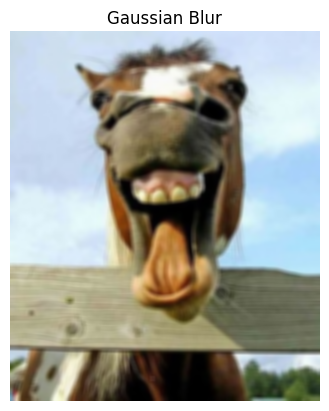

In [ ]:
image = cv2.imread('image1.jpg')
blurred = cv2.GaussianBlur(image, (17, 17), 900)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_rgb)
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()

### Sobel Edge Detection

The **Sobel filter** is a popular edge detection technique used in image processing and computer vision. It calculates the gradient of the image intensity at each pixel, highlighting regions of high spatial frequency that correspond to edges in the image. The Sobel filter is commonly used to detect edges along the **X** and **Y** axes (horizontal and vertical edges).

### **How Sobel Filter Works:**

The Sobel filter works by applying a small convolution kernel (3x3 matrix) to the image. It operates separately on the horizontal and vertical axes to calculate the rate of change (or gradient) in pixel intensity, which can be used to detect edges.

There are two main components to the Sobel filter:

1. **Sobel Filter in X Direction (Horizontal Edges)**:
   This detects edges that are **vertical** in the image by highlighting places where the intensity changes along the **X-axis**.

   The Sobel kernel for detecting horizontal gradients is:
   ```
   Gx =  [-1  0  1]
         [-2  0  2]
         [-1  0  1]
   ```

2. **Sobel Filter in Y Direction (Vertical Edges)**:
   This detects edges that are **horizontal** in the image by highlighting places where the intensity changes along the **Y-axis**.

   The Sobel kernel for detecting vertical gradients is:
   ```
   Gy =  [-1 -2 -1]
         [ 0  0  0]
         [ 1  2  1]
   ```

### **Operation of Sobel Filter**:

The Sobel filter is applied by convolving the image with both the **Gx** and **Gy** kernels to calculate the horizontal and vertical gradients, respectively.

- **Gx** detects changes in intensity in the X direction (left to right).
- **Gy** detects changes in intensity in the Y direction (top to bottom).

For each pixel, the horizontal gradient (`Gx`) and vertical gradient (`Gy`) are calculated, and then the magnitude of the gradient at that pixel is determined as:
$
G = \sqrt{Gx^2 + Gy^2}
$
Alternatively, for computational efficiency, the magnitude can be approximated using:
$
G \approx |Gx| + |Gy|
$
This gives the **strength** of the edge at that pixel.

### **Example:**

Let's say we have a small 3x3 patch of an image:
```
[ 10, 20, 10 ]
[ 20, 50, 20 ]
[ 10, 20, 10 ]
```

If we apply the Sobel **Gx** kernel (detecting vertical edges), the resulting convolution gives us a new matrix that highlights the horizontal changes in pixel intensity.

Similarly, applying the **Gy** kernel highlights vertical changes.

### **Sobel Filter in OpenCV:**
OpenCV provides a built-in function `cv2.Sobel()` to apply the Sobel filter to an image. It allows you to calculate gradients in both X and Y directions.

### **Applications of Sobel Filter**:
1. **Edge Detection**: Sobel filter is a foundational technique for detecting edges in images, used in applications like object detection, image segmentation, and feature extraction.
2. **Preprocessing for Computer Vision Tasks**: It is often used as a preprocessing step for further image analysis tasks, such as identifying key features in images for machine learning models.
3. **Noise Reduction**: Sobel is a "smoothed" derivative, making it less sensitive to noise compared to other edge detection techniques like simple gradient filters.

### **Why Sobel Filter?**
- **Smoothing Effect**: The Sobel filter includes a smoothing component (due to the -2 and +2 terms in the kernel), which helps reduce noise in edge detection.
- **Efficient**: It is computationally efficient while still providing good results for edge detection.
- **Direction-Sensitive**: Sobel can detect edges in both vertical and horizontal directions, which can then be combined to get the overall edge gradient.

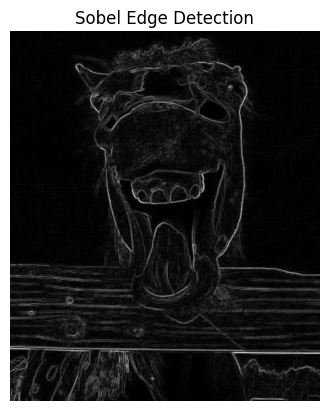

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude = cv2.magnitude(sobelx, sobely)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

# to compute an edge
# two types of filtes: y and x
# they are listed above(matrixes: 1 2 1) yields gx

# then rotate it and you get gy

## SELF - STUDY

**Self Study : Please research on Harris Corner Detection, this is used for detecting corners in images**

do this one
ref: https://www.youtube.com/watch?v=1LzJlVUSL5k

Certainly! Let’s break down the **Harris Corner Detection** algorithm **step-by-step with math** and a small toy example, using only mathematical explanations. We'll go from a simple grayscale image → compute gradients → compute structure tensor → corner response.

---

### Overview of Harris Corner Detection

The Harris Corner Detector identifies points in an image where the intensity changes significantly in **both x and y directions**, indicating a corner.

At a high level:

* Compute image gradients
* Construct the **structure tensor (second moment matrix)** `M`
* Compute the **corner response function** `R`
* Threshold `R` to find corners

---

#### Step 0: Toy Image Example

Let’s use a **5×5 grayscale image**, with an edge and a corner:

```
I =
[[100, 100, 100, 100, 100],
 [100, 100, 100, 100, 100],
 [100, 100, 255, 255, 255],
 [100, 100, 255, 255, 255],
 [100, 100, 255, 255, 255]]
```

This forms a corner at position (2,2), where intensity increases sharply in both x and y directions.

---

#### Step 1: Compute Image Gradients $I_x$, $I_y$

Typically using Sobel or Prewitt kernels, but conceptually:

* Horizontal gradient $I_x = \frac{\partial I}{\partial x}$
* Vertical gradient $I_y = \frac{\partial I}{\partial y}$

We’ll use a basic centered difference approximation for simplicity:

* $I_x(x, y) = I(x+1, y) - I(x-1, y)$
* $I_y(x, y) = I(x, y+1) - I(x, y-1)$

Let’s compute this for the center pixel (2,2):

* $I_x(2,2) = I(3,2) - I(1,2) = 255 - 100 = 155$
* $I_y(2,2) = I(2,3) - I(2,1) = 255 - 100 = 155$

So:

* $I_x^2 = 155^2 = 24025$
* $I_y^2 = 155^2 = 24025$
* $I_x I_y = 155 * 155 = 24025$

---

#### Step 2: Compute Structure Tensor Matrix $M$

At each pixel, compute:

$$
M = \begin{bmatrix}
\sum I_x^2 & \sum I_x I_y \\
\sum I_x I_y & \sum I_y^2
\end{bmatrix}
$$

Sum is taken over a small window (e.g., 3×3). Let's assume for simplicity that we only consider center pixel (or 3×3 if you want, but we'll show center only).

At (2,2):

$$
M = \begin{bmatrix}
A & B \\
B & D
\end{bmatrix}
= \begin{bmatrix}
\sum I_x^2 & \sum I_x I_y \\
\sum I_x I_y & \sum I_y^2
\end{bmatrix}
= \begin{bmatrix}
24025 & 24025 \\
24025 & 24025
\end{bmatrix}
$$

So, the components are:

* $A = \sum I_x^2$: Sum of squared horizontal gradients in a local window
* $D = \sum I_y^2$: Sum of squared vertical gradients in a local window
* $B = \sum I_x I_y$: Sum of product of horizontal and vertical gradients

---

#### Step 3: Compute Harris Response $R$

The Harris corner response is:

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

Where:

* $\det(M) = \lambda_1 \cdot \lambda_2 = A \cdot D - B^2$ Here, λs are eigen values
* $\text{trace}(M) = \lambda_1 + \lambda_2 = A + D$
* $k$ is a sensitivity constant (typically 0.04 – 0.06)

For our $M$ above:

* $\det(M) = (24025)(24025) - (24025)^2 = 0$
* $\text{trace}(M) = 24025 + 24025 = 48050$
* So,

$$
R = 0 - 0.04 \cdot (48050)^2 = -0.04 \cdot 2.31 \times 10^9 = -9.26 \times 10^7
$$

Since $R < 0$, this may actually indicate an **edge**, not a corner — this shows why windowing is important. Now let’s say the full 3×3 window contains mix of $I_x, I_y$, the actual values will better represent a corner.

---

#### Step 4: Interpret R

Absolutely — let’s connect **Harris corner detection** to **eigenvalues** of the structure tensor $M$ in an intuitive way.

---

**The Key Idea**

The Harris matrix $M$ is a **2×2 symmetric matrix** that encodes how the image intensity changes in a local window. Its eigenvalues $\lambda_1$ and $\lambda_2$ tell us **how much intensity varies** along two perpendicular directions.

---

##### Intuitive Interpretation of Eigenvalues

* $R \gg 0$: **Corner**
* $R \ll 0$: **Edge**
* $R \approx 0$: **Flat region**

| Eigenvalues $\lambda_1, \lambda_2$                       | Geometric Meaning                                      | Interpretation  |
| -------------------------------------------------------- | ------------------------------------------------------ | --------------- |
| Both small                                               | Intensity changes little in all directions             | **Flat region** |
| One large, one small                                     | Intensity changes in only one direction (like an edge) | **Edge**        |
| Both large and similar ( $\lambda_1 \approx \lambda_2$ ) | Intensity changes significantly in both directions     | **Corner**      |

---

##### Relation to the Harris Response Function

$$
R = \det(M) - k \cdot \text{trace}(M)^2 = \lambda_1 \lambda_2 - k(\lambda_1 + \lambda_2)^2
$$

* $R \ll 0$: One large, one small eigenvalue → edge
* $R \approx 0$: Both small → flat
* $R \gg 0$: Both large and similar → corner

---

##### Visual Analogy

Think of the eigenvalues describing the **shape of an ellipse** fit to the local gradient distribution:

* Circle → equal eigenvalues → corner
* Long thin ellipse → one dominant eigenvalue → edge
* Small dot → both small → flat

---

In our toy example, a proper 3×3 window would yield a better $M$ matrix showing strong gradients in **both** directions → high positive $R$ → corner.

---

#### Summary of Mathematical Steps

| Step | Operation                     | Formula                                                                                    |
| ---- | ----------------------------- | ------------------------------------------------------------------------------------------ |
| 1    | Compute gradients             | $I_x, I_y$ using finite difference                                                         |
| 2    | Compute structure tensor      | $M = \begin{bmatrix} \sum I_x^2 & \sum I_x I_y \\ \sum I_x I_y & \sum I_y^2 \end{bmatrix}$ |
| 3    | Compute determinant and trace | $\det(M), \text{trace}(M)$                                                                 |
| 4    | Harris score                  | $R = \det(M) - k \cdot (\text{trace}(M))^2$                                                |
| 5    | Thresholding                  | If $R$ above threshold → corner                                                            |

---
